In [4]:
import pandas as pd
import numpy as np
from math import *
from random import *
import datetime as datetime
import matplotlib.pyplot as plt

In [210]:
def global_update(F_xy, w, time_delta_last_time, theta, mu_xy):
# Decay triggering exponentials and calculate current intensities for all grids
    for k in range(0, len(w)):
        F_xy[k] = F_xy[k] * np.exp(-1*w[k]*time_delta_last_time)
    Lam_xy = mu_xy+sum(F_xy)
    
    return F_xy, Lam_xy

In [211]:
def event_update(mu_g, Lam_g, time_delta_last_g_time, theta, w, F_g, time_delta_last_time):
# update mu, theta and triggering exponentials for grids where event occurred
    dt = .01 
    mu_g = mu_g + dt*(mu_g/Lam_g - mu_g*time_delta_last_g_time)
    for k in range(0, len(w)):
        theta[k] = theta[k] + dt * (F_g[k]/Lam_g-theta[k])
        F_g[k] = F_g[k] + w[k]*theta[k]
        
    return mu_g, theta, F_g

#### Testing on generated data

In [212]:
def ESTProcess(mu, k0, w, T):
    p = pois(mu*T)
    times = np.random.uniform(0, T, p) #(low, high, size)
    counts = 0
    countf = p-1

    while(countf>=counts):
        p=pois(k0)    #each event generates p offspring according to a Poisson r.v. with parameter k0
        for j in range(0, p):
            temp=times[counts]-np.log(np.random.rand())/w    
            if(temp < T):    
                times = np.append(times, temp)
                countf=countf+1
        counts=counts+1

    times = times[0:countf]
    
    return times

    
def pois(S):
    if S <= 100:
        temp = -1*S
        L = exp(temp)
        k = 0
        p = 1
        while p > L:
            k = k + 1
            p = p * random()
        p = k - 1
    else:
        p = floor(S + sqrt(S) * random())
    return int(p)


In [257]:
mu = .1
k0 = .5
w_exact = .3
T = 90000
test_times = ESTProcess(mu, k0, w_exact, T)
test_times = np.sort(test_times)

In [258]:
# initial parameters
w = [.5, .1, .05]
theta = [.5, .4, .3]

events = len(test_times)

mu = .02
F = np.ones(len(w))*.1
Lam = np.ones(events)*0.01

# (tracking model parameters)
t1 = []
t2 = []
t3 = []
mu_track = []
F_track = []

for i in range(1, events):
    
    time_delta = (test_times[i]- test_times[i-1])
    
    # update exponentials, intensities (for all grid boxes)
    F, Lam[i] = global_update(F, w, time_delta, theta, mu) 
            
    # update model parameters based on grid box where current event happened, mu and theta are global. F is for 
    # box where event occurred (though in this case there is only one box)
    mu, theta, F = event_update(mu, Lam[i], time_delta, theta, w, F, time_delta)
    # (tracking model parameters)
    t1.append(theta[0])
    t2.append(theta[1])
    t3.append(theta[2])
    mu_track.append(mu)
    F_track.append(F)  

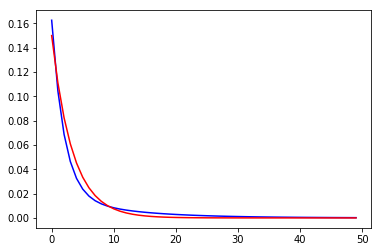

In [259]:
t= np.arange(0,50)
F = theta[0]*w[0]*np.exp(-w[0]*t) + theta[1]*w[1]*np.exp(-w[1]*t) + theta[2]*w[2]*np.exp(-w[2]*t)
F0=k0 * w_exact * np.exp(-w_exact*t)
plt.plot(F, 'b')
plt.plot(F0, 'r')
plt.show()

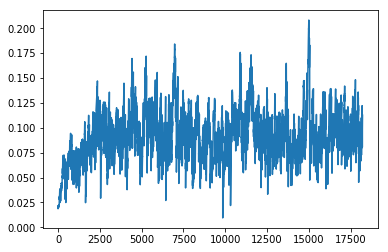

In [260]:
plt.plot(mu_track)

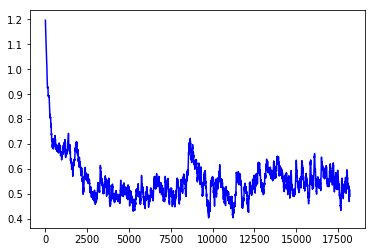

In [261]:
#plt.plot(t1, 'r')
#plt.plot(t2, 'g')
#plt.plot(t3, 'm')
t_est = []
for i in range(0, events-1):
    t_est.append(t1[i]+t2[i]+t3[i])
plt.plot(t_est, 'b')
plt.show()